In [ ]:
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/modified_data.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [ ]:
data.shape

(1460, 77)

In [ ]:
# drop() method removes the specified row or column
#“axis 0” represents rows and “axis 1” represents columns
data.drop('Id',inplace=True,axis=1)

In [ ]:
#number of features in original dataset
original_features=list(data.columns)
len(original_features)

76

In [ ]:
#gives number of features missing values in the system
features_missing_values=list(data.columns[data.isna().any()])
len(features_missing_values)

15

In [ ]:
#returns the number of items in an object.
#Also number of rows
len(data)

1460

**(iii)Filling In Missing Values** 

In [ ]:
#replaces the NULL values with the values from the next row (or next column, if the axis parameter is set to 'columns' )
#sometimes with the value of the column
#bfill() is used to backward fill the missing values in the dataset. It will backward fill the NaN values that are present in the pandas dataframe.
#mean_fill()
bfill,mean_fill=[],[]

In [ ]:
for feature in features_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [ ]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [ ]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [ ]:
#df.isna().any() finds all columns with null values
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [ ]:
#finds number of rows with null values
data['FireplaceQu'].isna().sum()

2

In [ ]:
data['FireplaceQu'].fillna(method='ffill',inplace=True)

***ENCODING DATASET***  Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

In [ ]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
numerical=list(set(original_features)-set(categorical_features))
numerical

['OverallCond',
 'GarageYrBlt',
 'MiscVal',
 'GarageCars',
 'FullBath',
 'BsmtHalfBath',
 'LowQualFinSF',
 'HalfBath',
 'Fireplaces',
 'YrSold',
 'OverallQual',
 'YearRemodAdd',
 'BsmtFinSF1',
 'WoodDeckSF',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'YearBuilt',
 '2ndFlrSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'KitchenAbvGr',
 'SalePrice',
 'GarageArea',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'EnclosedPorch',
 'GrLivArea',
 'OpenPorchSF',
 'MSSubClass',
 'PoolArea',
 'LotArea',
 'BsmtFullBath',
 'ScreenPorch',
 'LotFrontage',
 '3SsnPorch',
 'BedroomAbvGr',
 'MoSold']

In [ ]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
# Nominal data is classified without a natural order or rank, whereas ordinal data has a predetermined or natural order.
nominal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(nominal))

In [ ]:
target=['SalePrice']

In [ ]:
# get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables(variable with just two possible values).
df_nominal=pd.get_dummies(data[nominal])

In [ ]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal]

In [ ]:
data[numerical]

,OverallCond,GarageYrBlt,MiscVal,GarageCars,FullBath,BsmtHalfBath,LowQualFinSF,HalfBath,Fireplaces,YrSold,...,OpenPorchSF,MSSubClass,PoolArea,LotArea,BsmtFullBath,ScreenPorch,LotFrontage,3SsnPorch,BedroomAbvGr,MoSold
0,5,2003.0,0,2,2,0,0,1,0,2008,...,61,60,0,8450,1,0,65.0,0,3,2
1,8,1976.0,0,2,2,1,0,0,1,2007,...,0,20,0,9600,0,0,80.0,0,3,5
2,5,2001.0,0,2,2,0,0,1,1,2008,...,42,60,0,11250,1,0,68.0,0,3,9
3,5,1998.0,0,3,1,0,0,0,1,2006,...,35,70,0,9550,1,0,60.0,0,3,2
4,5,2000.0,0,3,2,0,0,1,1,2008,...,84,60,0,14260,1,0,84.0,0,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,1999.0,0,2,2,0,0,1,1,2007,...,40,60,0,7917,0,0,62.0,0,3,8
1456,6,1978.0,0,2,2,0,0,0,2,2010,...,0,20,0,13175,1,0,85.0,0,3,2
1457,9,1941.0,2500,1,2,0,0,0,2,2010,...,60,70,0,9042,0,0,66.0,0,4,5
1458,6,1950.0,0,1,1,0,0,0,0,2010,...,0,20,0,9717,1,0,68.0,0,2,4


In [ ]:
#“axis 0” represents rows and “axis 1” represents columns.
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [ ]:
new_data.shape

(1460, 107)

***STANDARDIZATION*** Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [ ]:
new_data.drop('SalePrice',axis=1,inplace=True)

In [ ]:
X=new_data.to_numpy()

In [ ]:
X[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
       4.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
       1.000e+00, 8.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 1.300e+01,
       5.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
       1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.200e+01, 2.000e+00,
       2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
       4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 2.003e+03,
       0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 2.008e+03, 7.000e+00, 2.003e+03, 

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
X[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888, -0.22571613,
        1.11993319,  0.22403433,  0.64046232,  0.303692  , -0.40779461,
        0.60466978,  0.36420746, -0.12579688,  0.31386709, -0.23012211,
       -0.40936914,  0.30941909,  0.75162623,  1.02668924,  0.2085023 ,
        0.25597761,  0.28780036, -1.23804229,  0.75073056,  0.06423821,
       -0.12304604, -0.77797579, -0.49151573,  0.74309239, -0.03628912,
        0.83559903, -0.29055229,  0.26381257, -0.41169079, -0.02618016,
        0.28974476,  0.18797343, -0.88465767, -0.03174026, -0.71

In [ ]:
y=data[target]

In [ ]:
y=y.to_numpy()

In [ ]:
y.shape

(1460, 1)

In [ ]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
y=StandardScaler().fit_transform(y)

In [ ]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [ ]:
X.shape

(1460, 106)

***FEATURE EXTRACTION USING PCA***  Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features

**Principle Component Analysis**


In [ ]:
#code projects the original data into 2 dimensions.
pca=PCA(n_components=2)

In [ ]:
p_components=pca.fit_transform(X)

In [ ]:
#
p_components

array([[ 2.44331095, -1.27812814],
       [ 0.31646028,  2.63753667],
       [ 2.85722287, -0.81094772],
       ...,
       [ 1.26182085, -0.85951767],
       [-2.85097468,  3.29503934],
       [-0.77738754,  2.79068742]])

In [ ]:
#The explained variance tells you how much information (variance) can be attributed to each of the principal components.
#During conversion some of the some of the variance (information) is lost
pca.explained_variance_ratio_

array([0.10560233, 0.04472092])

In [ ]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.443311,-1.278128,0.347273
1,0.316460,2.637537,0.007288
2,2.857223,-0.810948,0.536154
3,-1.333157,0.425083,-0.515281
4,5.220991,-0.250077,0.869843
...,...,...,...
1455,1.335076,-2.288544,-0.074560
1456,1.112791,3.258453,0.366161
1457,1.261821,-0.859518,1.077611
1458,-2.850975,3.295039,-0.488523


***TRAIN MODEL***

In [ ]:
reg=LassoCV()

In [ ]:
reg.fit(p_components,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [ ]:
reg.coef_

array([0.25387739, 0.01887039])

In [ ]:
reg.intercept_

1.836765450555225e-16

***EXAMPLE PLOTTING***

In [ ]:
final_data_array=final_data.to_numpy()

In [ ]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot,Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [ ]:
w_1 = reg.coef_[0]
w_2 = reg.coef_[1]
b = reg.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

In [ ]:
w_2

0.01887038615889582

Text(0.5, 0.92, 'Plane of Best Fit')

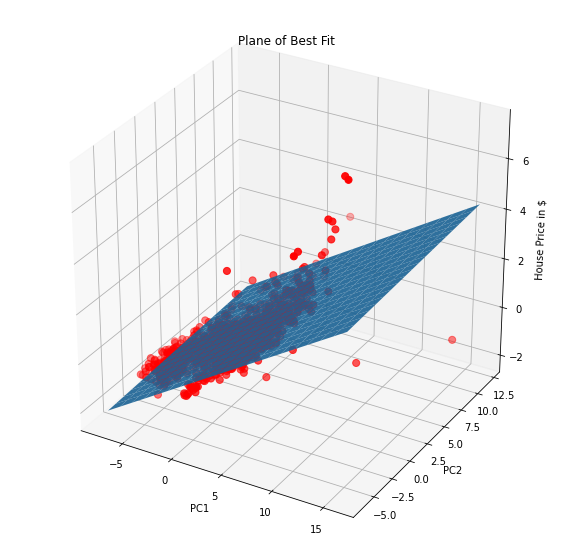

In [ ]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")

In [ ]:
y = w_1*x_1 + w_2*x_2

In [ ]:
y=mx+c

In [ ]:
y=wx+b